In [5]:
import pandas as pd
import re
import seaborn as sns
import numpy as np

# Preprocess the text data by removing stopwords, punctuation, and numbers

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

In [16]:
# Load the data
df = pd.read_json('../Data/cat_hearings_03_10_utterances_witnesses_MoCs_labels.json')
# Add a new dummy combining policy claim 4.4 and 4.5
df["L2dummy_4_45"] = df.apply(lambda x: [1.0 if i > 0 else 0.0 for i in [x.L2dummy_4_4 + x.L2dummy_4_5]][0], axis = 1)
# Add a new dummy combining policy claim 4.3 ,4.4, 4.5 and 4.6
df["L2dummy_4_3456"] = df.apply(lambda x: [1.0 if i > 0 else 0.0 for i in [x.L2dummy_4_3 + x.L2dummy_4_4 + x.L2dummy_4_5 + x.L2dummy_4_6]][0], axis = 1)
df.head(1)

,congress,chamber,committee,committee_short,year,date,title,hearing_id,type,last_name,...,L4claims,L4claims_multi_hot,L1policyclaims,L2policyclaims,L3policyclaims,L4policyclaims,L2policyclaims_multi_hot,labelled,L2dummy_4_45,L2dummy_4_3456
0,108,SENATE,"Committee on Commerce, Science, and Transporta...","Commerce, Science, and Transportation",2003,2003-01-08,Climate Change,108shrg95341,MoC,McCain,...,None,None,NaN,None,None,None,None,False,0.0,0.0


In [25]:
# Subset labelled contrarian witnesse testimonies
con = con[con.labelled == True].reset_index(drop=True)

In [ ]:
[i for i in df.keys()]

<AxesSubplot: >

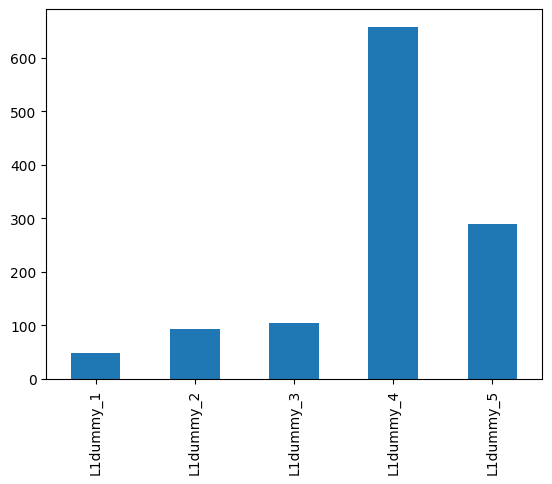

In [9]:
df.loc[:, "L1dummy_1":"L1dummy_5"].sum(axis=0).plot(kind="bar")

In [57]:
con['L1claims_multi_hot'].apply(lambda x: "".join([str(i) for i in x]))

0       100000
1       100000
2       100000
3       100000
4       100000
         ...  
1682    100000
1683    000001
1684    100000
1685    000001
1686    000001
Name: L1claims_multi_hot, Length: 1687, dtype: object

In [45]:
[i for i in con]

['congress',
 'chamber',
 'committee',
 'committee_short',
 'year',
 'date',
 'title',
 'hearing_id',
 'type',
 'last_name',
 'matched_speaker',
 'utterance',
 'text',
 'witness',
 'witness_affiliation',
 'witness_opensectrets_industry',
 'witness_opensectrets_sector',
 'witness_category',
 'witness_subcategory',
 'witness_state_research',
 'witness_contrarian_organisation',
 'witness_contrarian',
 'witness_denialist',
 'MoC_bioguide_id',
 'MoC_govtrack_id',
 'MoC_id',
 'MoC_name',
 'MoC_maj_min',
 'MoC_rank_within_party',
 'MoC_party_code',
 'MoC_date_of_assignment',
 'MoC_date_of_termination',
 'MoC_senior_party_member',
 'MoC_committee_seniority',
 'MoC_committee_period_of_service',
 'MoC_committee_status_at_end_of_this_congress',
 'MoC_committee_continuity_of_assignment_in_next_congress',
 'MoC_appointment_citation',
 'MoC_state_icpsr',
 'MoC_cd_code',
 'MoC_stab',
 'MoC_notes',
 'MoC_Party',
 'MoC_CID',
 'MoC_last_name',
 'MoC_first_name',
 'MoC_birthday',
 'MoC_gender',
 'word_co

In [109]:
# Export the data

# Select all columns not containing lists
export = con.iloc[:, list(range(0,52)) + list(range(57,162))]
export.to_json("../Data/contrarian_witnesses_03_10_utterances_witnesses_MoCs_labels_for_plotting.json")
export.to_csv("../Data/contrarian_witnesses_03_10_utterances_witnesses_MoCs_labels_for_plotting.csv")

<AxesSubplot: xlabel='year'>

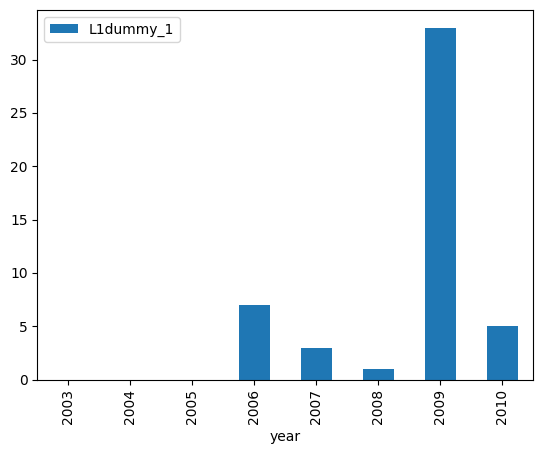

In [14]:
df.loc[:, ("year", "L1dummy_1")].groupby("year").sum().plot(kind="bar")

In [38]:
con.loc[:, ("year", "hearing_id", "last_name", "L1dummy_1")].groupby(["year", "hearing_id", "last_name", "L1dummy_1"]).value_counts()

year  hearing_id    last_name  L1dummy_1
2003  108hhrg88427  Holmstead  0.0          42
      108shrg91748  Rogers     0.0          18
                    Thorning   0.0          13
2004  108hhrg98899  Gattuso    0.0           6
                    Kovacs     0.0           3
                                            ..
2010  111hhrg62618  Lindzen    0.0          22
                               1.0           2
                    Michaels   0.0          14
                               1.0           2
      111hhrg76568  Drevna     0.0          22
Length: 103, dtype: int64

In [36]:
con.loc[:, ("year", "hearing_id", "last_name", "L1dummy_4")].groupby(["year", "hearing_id", "last_name", "L1dummy_4"]).value_counts()

year  hearing_id    last_name  L1dummy_4
2003  108hhrg88427  Holmstead  0.0          39
                               1.0           3
      108shrg91748  Rogers     0.0           8
                               1.0          10
                    Thorning   0.0           4
                                            ..
2010  111hhrg62618  Lindzen    0.0          22
                               1.0           2
                    Michaels   0.0          16
      111hhrg76568  Drevna     0.0           6
                               1.0          16
Length: 165, dtype: int64

In [114]:
con.loc[:, ("hearing_id", "last_name")].drop_duplicates()


,hearing_id,last_name
0,108shrg91748,Rogers
18,108shrg91748,Thorning
31,108hhrg88427,Holmstead
73,108hhrg98899,Kovacs
74,108hhrg98899,Gattuso
...,...,...
1547,111hhrg62590,Monckton
1575,111hhrg58145,Happer
1619,111hhrg62618,Lindzen
1643,111hhrg62618,Michaels
